# Ricardo D. Andrade Rodríguez, Data Scientist

## Advanced Logistic Problem

 $\ $  The "Knapsack Problem" is a very common problem that solves the question for "it is possible to fill every backpack with all the available packagees?" in this document I present **an algorithm that will optimize the maximum allocation number of packages into the availables Trucks (transportation)**. 
  
 $\ $ The considerations (constraints) are the following:

* There are a total of 20 packages, all diferents sizes.
* The company has budget to rent a total of 10 Trucks.
* Taking the problem to a more complex enviroment the Packages' sizes has not been declared. This is we do not know the Packages' sizes that will arrive (they are random).
* We do not know the capacity of the trucks (transportation), the availibility of the trucks are random.
* The packages are equally important.
* We can not over fit the transportation.

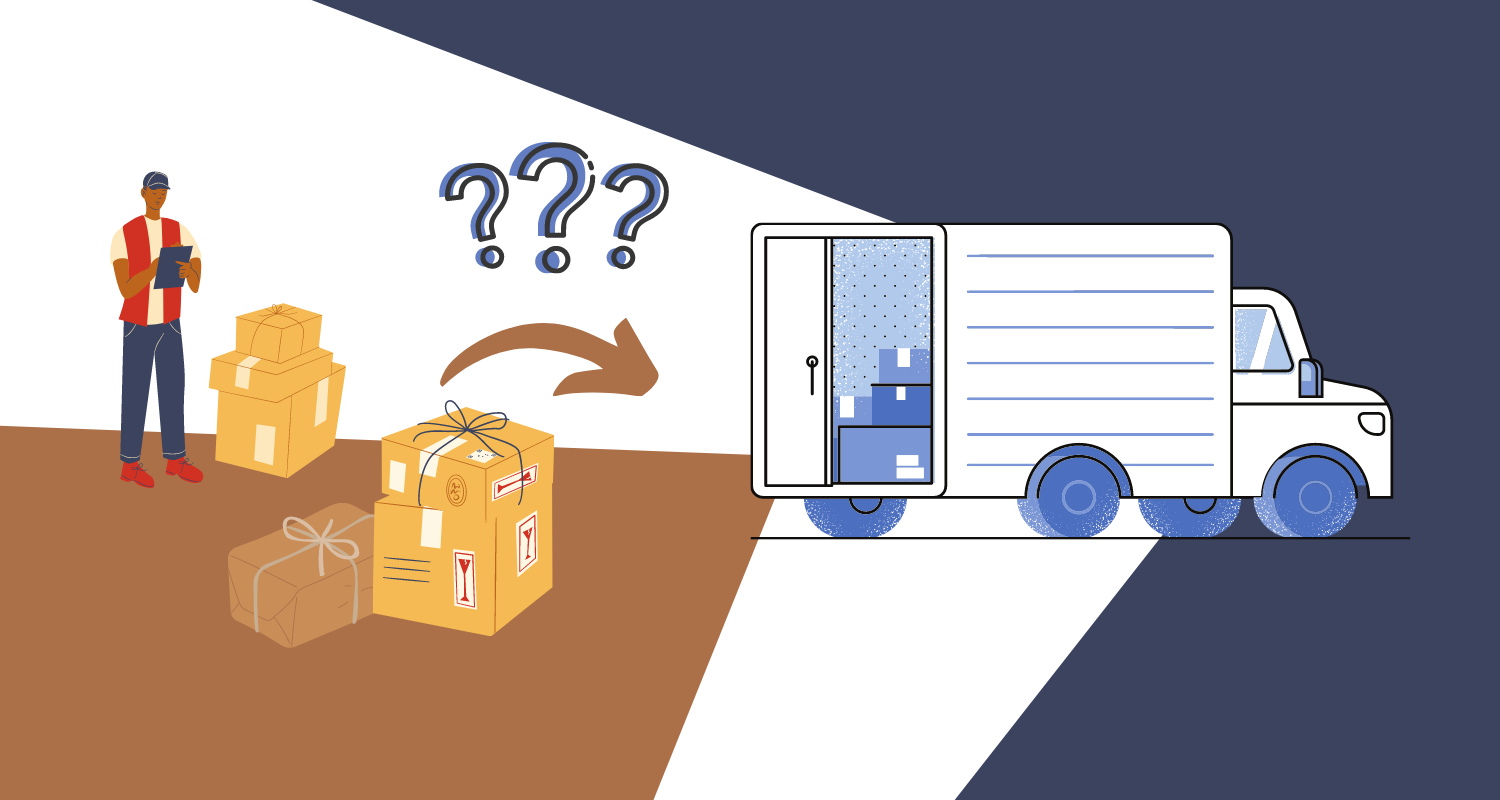

In [1]:
pip install pulp


In [2]:
# Libraries

from numpy.random import rand
import numpy as np
import pandas as pd
from pulp import *

In [3]:
Truck_Capacity = sorted(rand(10)*20,reverse=True)  #Cambiar para que las cajas puedan ser menor al box
Truck = ["Truck_"+str(i) for i in range(1,11)]
Truck = pd.DataFrame(list(zip(Truck,Truck_Capacity)),columns =['Truck', 'Truck_Capacity'])
Truck

,Truck,Truck_Capacity
0,Truck_1,19.850256
1,Truck_2,19.796792
2,Truck_3,17.505941
3,Truck_4,13.521425
4,Truck_5,13.509429
5,Truck_6,7.789104
6,Truck_7,5.403935
7,Truck_8,4.076632
8,Truck_9,3.009286
9,Truck_10,1.951577


In [4]:
package_sizes = sorted(rand(20)*10,reverse=True)
package_sizes

[9.612849719354465,
 9.107833210413824,
 8.897537246241779,
 8.229099641616017,
 7.248775778705849,
 7.243907878887319,
 6.7807609661703685,
 6.274196420190551,
 5.5709999535917785,
 3.7114014277828677,
 3.1498964969505705,
 3.129081876170549,
 3.0659826855507433,
 3.0653031142331235,
 2.543684062695565,
 1.7773842685099772,
 0.8566026271514038,
 0.4112882005621388,
 0.17410445591586443,
 0.058323119699990045]

In order to get a multidimensional result the easiest way is bind the same data frame 10 times (the number of packages) and work each "section" to their corresponded truck.

In [5]:
df = pd.DataFrame({'Variable': ["package_1","package_2","package_3","package_4","package_5","package_6","package_7","package_8","package_9","package_10",
                                "package_11","package_12","package_13","package_14","package_15","package_16","package_17","package_18","package_19","package_20"],
                    'Sizes': package_sizes })
df

,Variable,Sizes
0,package_1,9.612850
1,package_2,9.107833
2,package_3,8.897537
3,package_4,8.229100
4,package_5,7.248776
5,package_6,7.243908
6,package_7,6.780761
7,package_8,6.274196
8,package_9,5.571000
9,package_10,3.711401


In [6]:
 df_multidim = df.assign(Truck = "Truck_"+str(1))
for i in range(2,11):
    x = df.assign(Truck = "Truck_"+str(i))
    df_multidim = df_multidim.append(x, ignore_index=True)

In [7]:
df_multidim

,Variable,Sizes,Truck
0,package_1,9.612850,Truck_1
1,package_2,9.107833,Truck_1
2,package_3,8.897537,Truck_1
3,package_4,8.229100,Truck_1
4,package_5,7.248776,Truck_1
...,...,...,...
195,package_16,1.777384,Truck_10
196,package_17,0.856603,Truck_10
197,package_18,0.411288,Truck_10
198,package_19,0.174104,Truck_10


In [8]:
package_num = list(range(0,200))
sizes = dict(zip(package_num, df_multidim['Sizes']))

In [9]:
# Objective function Declaration
prob = LpProblem('Allocation', LpMinimize) 
indicator = LpVariable.dicts("vars",package_num, cat='Binary')                       # Variables to change

prob += lpSum([indicator[i] * sizes[i] for i in range(0, 20)])<= Truck_Capacity[0]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(20, 40)])<= Truck_Capacity[1]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(40, 60)])<= Truck_Capacity[2]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(60, 80)])<= Truck_Capacity[3]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(80, 100)])<= Truck_Capacity[4]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(100, 120)])<= Truck_Capacity[5]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(120, 140)])<= Truck_Capacity[6]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(140, 160)])<= Truck_Capacity[7]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(160, 180)])<= Truck_Capacity[8]   # Constraint1
prob += lpSum([indicator[i] * sizes[i] for i in range(180, 200)])<= Truck_Capacity[9]   # Constraint1

# prob += lpSum([indicator[i]* sizes[i] for i in package_num])  

In [10]:
for r in range(0, 20):
  prob += lpSum([indicator[i]  for i in range(r, 200, 20)])<=1   # Restriction set that there will be only one usage per package

In [11]:
all_bags  = lpSum([indicator[i] * sizes[i] for i in range(0, 200)])

prob += lpSum(sum(Truck_Capacity) - all_bags)             # Objective Function

In [13]:
#Print the full model

print(prob)

Allocation:
MINIMIZE
-9.612849719354465*vars_0 + -9.107833210413824*vars_1 + -3.1498964969505705*vars_10 + -9.612849719354465*vars_100 + -9.107833210413824*vars_101 + -8.897537246241779*vars_102 + -8.229099641616017*vars_103 + -7.248775778705849*vars_104 + -7.243907878887319*vars_105 + -6.7807609661703685*vars_106 + -6.274196420190551*vars_107 + -5.5709999535917785*vars_108 + -3.7114014277828677*vars_109 + -3.129081876170549*vars_11 + -3.1498964969505705*vars_110 + -3.129081876170549*vars_111 + -3.0659826855507433*vars_112 + -3.0653031142331235*vars_113 + -2.543684062695565*vars_114 + -1.7773842685099772*vars_115 + -0.8566026271514038*vars_116 + -0.4112882005621388*vars_117 + -0.17410445591586443*vars_118 + -0.058323119699990045*vars_119 + -3.0659826855507433*vars_12 + -9.612849719354465*vars_120 + -9.107833210413824*vars_121 + -8.897537246241779*vars_122 + -8.229099641616017*vars_123 + -7.248775778705849*vars_124 + -7.243907878887319*vars_125 + -6.7807609661703685*vars_126 + -6.274196

In [16]:
#Solve the optmization problem and Status

status = prob.solve()
LpStatus[status]

'Optimal'

In [17]:
value(prob.objective)  # This is the total capacity left. We reduce space in each combination of packages and Trucks
                       # and this is the minimum optimal.

15.50536410781711

# Formatting the results

In [18]:
stored_value = []
for v in prob.variables():
    stored_value.append(str(v.varValue))

In [19]:
results=list(map(float, stored_value))

In [21]:
df_multidim = df_multidim.assign(Results = results)

In [22]:
df_results = df_multidim[df_multidim['Results']>0]

## Optimization results

**In the next table we can visualize which packages goes into which Truck, order by Truck.**


In [23]:
df_results

,Variable,Sizes,Truck,Results
11,package_12,3.129082,Truck_1,1.0
23,package_4,8.229100,Truck_2,1.0
39,package_20,0.058323,Truck_2,1.0
42,package_3,8.897537,Truck_3,1.0
59,package_20,0.058323,Truck_3,1.0
84,package_5,7.248776,Truck_5,1.0
87,package_8,6.274196,Truck_5,1.0
113,package_14,3.065303,Truck_6,1.0
116,package_17,0.856603,Truck_6,1.0
137,package_18,0.411288,Truck_7,1.0
